In [1]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
data = pd.read_csv(uri)

In [2]:
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
from datetime import date
year_today = date.today().year
year_today


2022

In [4]:
data["model_years"] = year_today-data["model_year"]
data["km_per_year"] = data["mileage_per_year"]*1.60934
data = data.drop(['Unnamed: 0', 'mileage_per_year','model_year'], axis=1)
data.head()


,price,sold,model_years,km_per_year
0,30941.02,yes,22,35085.22134
1,40557.96,yes,24,12622.05362
2,89627.50,no,16,11440.79806
3,95276.14,no,7,43167.32682
4,117384.68,yes,8,12770.11290


In [5]:
classif = {
    'no' : 0,
    'yes' : 1
}
data["sold"] = data["sold"].map(classif)
data.head()

,price,sold,model_years,km_per_year
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [6]:
#Modelo LinearSVC
x = data[['price', 'model_years', 'km_per_year']]
y = data['sold']

In [7]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

seed = 5
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = LinearSVC(random_state = seed)
model.fit(train_x, train_y)
predict_y = model.predict(test_x)
accuracy = accuracy_score(test_y, predict_y)*100
"The accuracy is %.2f%%" % accuracy


'The accuracy is 71.00%'

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

seed = 5
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC(random_state = seed)
model.fit(train_x, train_y)
predict_y = model.predict(test_x)
accuracy = accuracy_score(test_y, predict_y)*100
"The accuracy is %.2f%%" % accuracy

'The accuracy is 77.48%'

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 5
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

dummy = DummyClassifier(strategy="stratified")
dummy.fit(train_x, train_y)
predict_y = dummy.predict(test_x)
accuracy = accuracy_score(test_y, predict_y)*100
"The accuracy is %.2f%%" % accuracy


'The accuracy is 50.96%'

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 5
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify = y)

model = DecisionTreeClassifier(max_depth=3)
model.fit(train_x, train_y)
predict_y = model.predict(test_x)
accuracy = accuracy_score(test_y, predict_y)*100
"The accuracy is %.2f%%" % accuracy

'The accuracy is 79.28%'

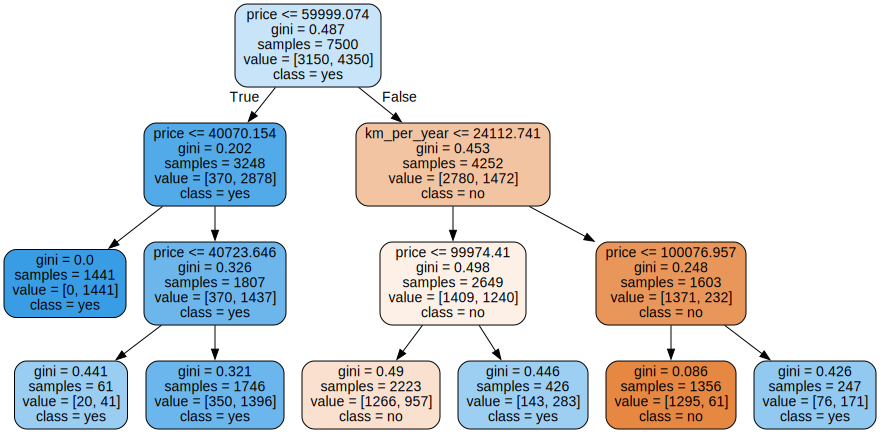

In [11]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names = features, filled=True, rounded=True, class_names=["no","yes"])
grafico = graphviz.Source(dot_data)
grafico